<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Optional:--Explore-Dataset" data-toc-modified-id="Optional:--Explore-Dataset-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Optional:  Explore Dataset</a></span></li></ul></li><li><span><a href="#restricted-boltzmann-machine" data-toc-modified-id="restricted-boltzmann-machine-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>restricted boltzmann machine</a></span><ul class="toc-item"><li><span><a href="#Vary-epochs" data-toc-modified-id="Vary-epochs-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vary epochs</a></span></li><li><span><a href="#Probability-Input" data-toc-modified-id="Probability-Input-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Probability Input</a></span></li><li><span><a href="#Vary-hidden-layer-size" data-toc-modified-id="Vary-hidden-layer-size-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Vary hidden layer size</a></span></li><li><span><a href="#Examinate-Outcome" data-toc-modified-id="Examinate-Outcome-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Examinate Outcome</a></span></li></ul></li><li><span><a href="#deep--belief-net" data-toc-modified-id="deep--belief-net-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>deep- belief net</a></span><ul class="toc-item"><li><span><a href="#Two-stack-RBM" data-toc-modified-id="Two-stack-RBM-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Two stack RBM</a></span></li></ul></li><li><span><a href="#greedy-layer-wise-training" data-toc-modified-id="greedy-layer-wise-training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>greedy layer-wise training</a></span></li><li><span><a href="#fine-tune-wake-sleep-training" data-toc-modified-id="fine-tune-wake-sleep-training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>fine-tune wake-sleep training</a></span></li></ul></div>

**Imports**

In [1]:
# Re-import packages if they change
%load_ext autoreload
%autoreload 2

import struct
import matplotlib.animation as animation

import matplotlib.pyplot as plt 
import tqdm
import matplotlib.image as mpimg 
from datetime import date, datetime

from util import *
from rbm import RestrictedBoltzmannMachine 
from dbn import DeepBeliefNet

**Declare image-size and load dataset**

In [2]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

### Optional:  Explore Dataset

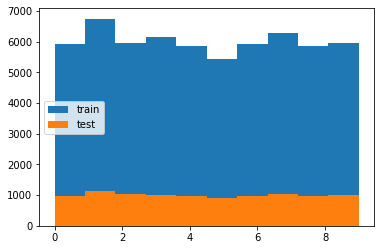

In [3]:
# Distribution of Classes in training and test 
plt.hist(np.where(train_lbls == 1)[1], label='train')
plt.hist(np.where(test_lbls == 1)[1], label='test')
plt.legend(loc = 'center left')

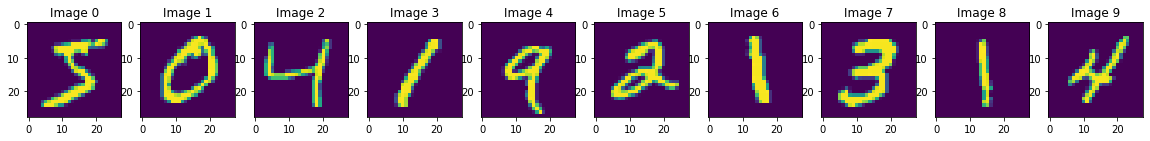

In [4]:
#Vizualising random images
fig, axs = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
    axs[i].set_title('Image {:d}'.format(i))
    axs[i].imshow(train_imgs[i].reshape((28,28)))
plt.show()

In [5]:
# Image shape
print("Image shape: ", train_imgs[0].shape)
print("Max Image value: ", np.max(train_imgs))
print("Min Image value: ", np.min(train_imgs))
# print('Unique Image values: ', np.unique(train_imgs))  # Input not only zero and 1
print("Number of training samples: ", train_imgs.shape[0])
print("Number of test samples: ", test_imgs.shape[0])

Image shape:  (784,)
Max Image value:  1.0
Min Image value:  0.0
Number of training samples:  60000
Number of test samples:  10000


In [6]:
label = 8
idx = np.where(np.where(train_lbls == 1)[1] == label)
idx_label = np.where(train_lbls == 1)[0][idx]
idx_label

array([   17,    31,    41, ..., 59989, 59995, 59999])

## restricted boltzmann machine

<div class="alert alert-note">
<b>Task: </b> 
Implement an RBM for recognisisng MNIST images
   
* with binary stochatic units
* train with a contrastive divergence algorithm $CD_1$
* start with 500 units
</div>

<div class="alert alert-success">
<b>Vary number of epochs</b>
    
* loss starts quite high with 11 
* converges to around 1.9
* doesn't change anymore after 8 epochs

<b>Compare binary input and probability input</b>
    
* a little bis higher with probabilities, but pretty similar

<b>Effect of hidden layer size</b>
    
* with 200 units loss starts higher with 33, but decrease also to 2.1
* loss decreases till 5.3 

<b>Examine outcomes</b>
    
* rf doesn't change anymore after 10 epochs
* parts of difits are visible in rf
</div>

<div class="alert alert-danger">
<b>Questions</b> 

</div>

### Vary epochs

In [7]:
batch_size = 10
epochs = np.arange(10, 20, 5)
#n_iterations_basic = int(train_imgs.shape[0] / batch_size * i)
for i in epochs:
    print("\nStarting a Restricted Boltzmann Machine..")
    # Changed from 10
    rbm = RestrictedBoltzmannMachine(
        ndim_visible=image_size[0] * image_size[1],
        ndim_hidden=500,
        is_bottom=True,
        image_size=image_size,
        is_top=False,
        n_labels=10,
        batch_size=batch_size,
    )
    # each epoch corresponds to a full swipe through a training set divided into mini-batches
    n_iterations = int(train_imgs.shape[0] / batch_size * i)
    print("Trained for {:d} iterations".format(n_iterations))
    rbm.cd1(visible_trainset=train_imgs, n_iterations=n_iterations)


Starting a Restricted Boltzmann Machine..
Trained for 60000 iterations
learning CD1


iteration=      0 recon_loss=6.5681
iteration=   5000 recon_loss=2.2146
iteration=  10000 recon_loss=2.1286
iteration=  15000 recon_loss=2.1136
iteration=  20000 recon_loss=2.0816
iteration=  25000 recon_loss=2.1046
iteration=  30000 recon_loss=2.1175
iteration=  35000 recon_loss=2.1042
iteration=  40000 recon_loss=2.0901
iteration=  45000 recon_loss=2.0428
iteration=  50000 recon_loss=2.0393
iteration=  55000 recon_loss=2.0646


Starting a Restricted Boltzmann Machine..
Trained for 90000 iterations
learning CD1


iteration=      0 recon_loss=6.6791
iteration=   5000 recon_loss=2.2341
iteration=  10000 recon_loss=2.0887
iteration=  15000 recon_loss=2.0805
iteration=  20000 recon_loss=2.0427
iteration=  25000 recon_loss=2.0731
iteration=  30000 recon_loss=2.0887
iteration=  35000 recon_loss=2.0147
iteration=  40000 recon_loss=2.0205
iteration=  45000 recon_loss=1.9879
iteration=  50000 recon_loss=1.9756
iteration=  55000 recon_loss=1.9925
iteration=  60000 recon_loss=2.0139
iteration=  65000 recon_loss=2.0124
iteration=  70000 recon_loss=1.9742
iteration=  75000 recon_loss=2.0295
iteration=  80000 recon_loss=2.0003
iteration=  85000 recon_loss=2.0018



### Probability Input

In [12]:
print("\nStarting a Restricted Boltzmann Machine..")
exp_time = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
print("Results saved in folder: ",exp_time )
os.makedirs(exp_time)

rbm = RestrictedBoltzmannMachine(
        ndim_visible=image_size[0] * image_size[1],
        ndim_hidden=500,
        is_bottom=True,
        image_size=image_size,
        is_top=False,
        n_labels=10,
        batch_size=batch_size,
    )
n_iterations = 30000
print("Trained for {:d} iterations".format(n_iterations))
rbm.cd1(visible_trainset=train_imgs, n_iterations=n_iterations, binary_vis=False, img_dir=exp_time)


Starting a Restricted Boltzmann Machine..
Results saved in folder:  2020-02-21_11-44-34
Trained for 30000 iterations
learning CD1


iteration=      0 recon_loss=6.5295
iteration=   5000 recon_loss=2.3416
iteration=  10000 recon_loss=2.1993
iteration=  15000 recon_loss=2.3032
iteration=  20000 recon_loss=2.2364
iteration=  25000 recon_loss=2.2648



### Vary hidden layer size

In [14]:
batch_size = 10
ndims_hidden = np.arange(200, 501, 100)
n_iterations = 6000
for ndim_hidden in ndims_hidden:
    exp_time = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    print("Results saved in folder: ",exp_time )
    os.makedirs(exp_time)

    print("\nStarting a Restricted Boltzmann Machine..")
    # Changed from 10
    rbm = RestrictedBoltzmannMachine(
        ndim_visible=image_size[0] * image_size[1],
        ndim_hidden=ndim_hidden,
        is_bottom=True,
        image_size=image_size,
        is_top=False,
        n_labels=10,
        batch_size=batch_size,
    )
    # each epoch corresponds to a full swipe through a training set divided into mini-batches
    print("Trained for {:d} iterations".format(n_iterations))
    rbm.cd1(visible_trainset=train_imgs, n_iterations=n_iterations, img_dir=exp_time)

[autoreload of dbn failed: Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/opt/conda/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/opt/conda/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/workspace/development/ANN_Lab4/dbn.py", line 151
    self.rbm_stack["hid--pen"

Results saved in folder:  2020-02-21_11-53-59

Starting a Restricted Boltzmann Machine..
Trained for 90000 iterations
learning CD1


iteration=      0 recon_loss=33.7561
iteration=   5000 recon_loss=2.3282
iteration=  10000 recon_loss=2.1701
iteration=  15000 recon_loss=2.1428
iteration=  20000 recon_loss=2.1826
iteration=  25000 recon_loss=2.1140
iteration=  30000 recon_loss=2.2397
iteration=  35000 recon_loss=2.3066
iteration=  40000 recon_loss=2.1319
iteration=  45000 recon_loss=2.1368
iteration=  50000 recon_loss=2.1004
iteration=  55000 recon_loss=2.0985
iteration=  60000 recon_loss=2.1849
iteration=  65000 recon_loss=2.1146
iteration=  70000 recon_loss=2.0906
iteration=  75000 recon_loss=2.1915
iteration=  80000 recon_loss=2.0953
iteration=  85000 recon_loss=2.0443

Results saved in folder:  2020-02-21_12-09-35

Starting a Restricted Boltzmann Machine..
Trained for 90000 iterations
learning CD1


iteration=      0 recon_loss=17.9898
iteration=   5000 recon_loss=2.2538
iteration=  10000 recon_loss=2.1483
iteration=  15000 recon_loss=2.0775
iteration=  20000 recon_loss=2.0667
iteration=  25000 recon_loss=2.0987
iteration=  30000 recon_loss=2.0804
iteration=  35000 recon_loss=2.1056
iteration=  40000 recon_loss=2.0463
iteration=  45000 recon_loss=2.0221
iteration=  50000 recon_loss=2.0364
iteration=  55000 recon_loss=2.0467
iteration=  60000 recon_loss=2.1377
iteration=  65000 recon_loss=2.0247
iteration=  70000 recon_loss=2.0259
iteration=  75000 recon_loss=2.0317
iteration=  80000 recon_loss=1.9885
iteration=  85000 recon_loss=2.0781

Results saved in folder:  2020-02-21_12-19-26

Starting a Restricted Boltzmann Machine..
Trained for 90000 iterations
learning CD1


iteration=      0 recon_loss=10.3470
iteration=   5000 recon_loss=2.3568
iteration=  10000 recon_loss=2.0828
iteration=  15000 recon_loss=2.1157
iteration=  20000 recon_loss=2.1205
iteration=  25000 recon_loss=2.0486
iteration=  30000 recon_loss=2.0523
iteration=  35000 recon_loss=2.0467
iteration=  40000 recon_loss=2.0251
iteration=  45000 recon_loss=2.0127
iteration=  50000 recon_loss=2.0239
iteration=  55000 recon_loss=2.0199
iteration=  60000 recon_loss=2.0445
iteration=  65000 recon_loss=2.0306
iteration=  70000 recon_loss=2.0282
iteration=  75000 recon_loss=1.9961
iteration=  80000 recon_loss=2.0593
iteration=  85000 recon_loss=2.0370

Results saved in folder:  2020-02-21_12-33-53

Starting a Restricted Boltzmann Machine..
Trained for 90000 iterations
learning CD1


iteration=      0 recon_loss=6.9110
iteration=   5000 recon_loss=2.2367
iteration=  10000 recon_loss=2.0844
iteration=  15000 recon_loss=2.0630
iteration=  20000 recon_loss=2.0297
iteration=  25000 recon_loss=2.0034
iteration=  30000 recon_loss=2.0469
iteration=  35000 recon_loss=2.0311
iteration=  40000 recon_loss=1.9945
iteration=  45000 recon_loss=2.0414
iteration=  50000 recon_loss=1.9903
iteration=  55000 recon_loss=1.9700
iteration=  60000 recon_loss=2.0284
iteration=  65000 recon_loss=1.9947
iteration=  70000 recon_loss=2.0085
iteration=  75000 recon_loss=1.9890
iteration=  80000 recon_loss=1.9759
iteration=  85000 recon_loss=2.0168



### Examinate Outcome


In [ ]:
# Read Images 
img = mpimg.imread('rf.iter000000.png')  
plt.imshow(img)

In [ ]:
img = mpimg.imread('rf.iter040000.png')  
plt.imshow(img)

## deep- belief net

<div class="alert alert-note">
<b>Task: </b> 
Implement a deep networ with greedy layer-wise pretraining
   
* extend the network to a "deeper" architecture
* examine the generalisation performance
* hidden layer of the last RBM are concatenated with the hidden layer 
* bi-directional connection layer is added to perform Gibbs sampling 
</div>

<div class="alert alert-success">
<b>Two stack RBM</b>
    
* reconstruction losses 


</div>

<div class="alert alert-danger">
<b>Questions</b> 

* Do we implement two seperate rbm classes? Or do we inizialize on and then build for two cd1
* untwine_weights should we add initilize weights? 
* what is the difference between direct and not direct
* how should we calculate the input of the second/third RBM
</div>

### Two stack RBM

In [ ]:
print ("\nStarting a Deep Belief Net..")
    
dbn = DeepBeliefNet(sizes={"vis":image_size[0]*image_size[1], "hid":500, "pen":500, "top":2000, "lbl":10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=10
)
exp_time = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
train_greedylayerwise(
    self, 
    vis_trainset, 
    lbl_trainset, 
    n_iterations, 
    train_top_layer=False, 
    img_dir='two-stack/%s'%exp_time)

## greedy layer-wise training

In [ ]:
dbn.train_greedylayerwise(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=2000)

dbn.recognize(train_imgs, train_lbls)

dbn.recognize(test_imgs, test_lbls)

for digit in range(10):
    digit_1hot = np.zeros(shape=(1,10))
    digit_1hot[0,digit] = 1
    dbn.generate(digit_1hot, name="rbms")

## fine-tune wake-sleep training

In [ ]:
dbn.train_wakesleep_finetune(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=2000)

dbn.recognize(train_imgs, train_lbls)

dbn.recognize(test_imgs, test_lbls)

for digit in range(10):
    digit_1hot = np.zeros(shape=(1,10))
    digit_1hot[0,digit] = 1
    dbn.generate(digit_1hot, name="dbn")